#### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Импорт и загрузка данных

Загрузим наши данные

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


В наших данных пустой столбец, удалим его.

In [5]:
df = df.drop('Unnamed: 5', axis= 1)

Проверим уникальные значения в столбце `status`

In [6]:
df['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

Создадим подвыборки для каждого месяца, а также столбце `status` есть внутренний договор, его использовать мы не будем

In [7]:
october = df.status[df.status == 'Октябрь 2021'].index[0]
september = df.status[df.status == 'Сентябрь 2021'].index[0]
august = df.status[df.status == 'Август 2021'].index[0]
july = df.status[df.status == 'Июль 2021'].index[0]
june = df.status[df.status == 'Июнь 2021'].index[0]
may = df.status[df.status == 'Май 2021'].index[0]

In [8]:
october_frame = df.iloc[october+1:].copy()
september_frame = df.iloc[september + 1 : october].copy()
august_frame =  df.iloc[august + 1 : september].copy()
july_frame = df.iloc[july + 1 : august].copy()
june_frame = df.iloc[june + 1 : july].copy()
may_frame = df.iloc[may + 2: june].copy()

## Вопросы

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.
2) Как изменялась выручка компании за рассматриваемый период?
Проиллюстрируйте графиком.
3) Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?
4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?
5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

### Вопрос 1

Рассмотрим месяц июль

In [9]:
july_frame.head()

,client_id,sum,status,sale,new/current,document,receiving_date
259,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09 00:00:00
260,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09 00:00:00
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaN
262,21.0,4313.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-09-17 00:00:00
263,24.0,19407.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-08-19 00:00:00


Рассмотрим информацию

In [10]:
july_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 259 to 368
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       110 non-null    float64
 1   sum             110 non-null    float64
 2   status          110 non-null    object 
 3   sale            110 non-null    object 
 4   new/current     110 non-null    object 
 5   document        109 non-null    object 
 6   receiving_date  107 non-null    object 
dtypes: float64(2), object(5)
memory usage: 6.1+ KB


Также в двух столбцах есть пропуски, обработаем их

In [11]:
july_frame[july_frame.isnull().values.any(axis=1)]

,client_id,sum,status,sale,new/current,document,receiving_date
261,18.0,2996.7,ОПЛАЧЕНО,Иванов,текущая,НЕТ,NaN
337,228.0,2193.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-10-06 00:00:00
358,266.0,3363.7,ОПЛАЧЕНО,Петрова,текущая,НЕТ,NaN
366,284.0,1977.7,ПРОСРОЧЕНО,Филимонова,текущая,НЕТ,NaN


- В 3 строках столбца `receiving_date` есть пропуски, связано это с отсутствием оригинала документа, их обрабатывать мы не будем
- В 1 строке столбца `document` есть пропуск. Пропуск случайный, так как дата подачи оригинала записана, поменяем значение на **оригинал**

In [12]:
july_frame['document'] = july_frame['document'].fillna('оригинал')

In [13]:
july_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 259 to 368
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       110 non-null    float64
 1   sum             110 non-null    float64
 2   status          110 non-null    object 
 3   sale            110 non-null    object 
 4   new/current     110 non-null    object 
 5   document        110 non-null    object 
 6   receiving_date  107 non-null    object 
dtypes: float64(2), object(5)
memory usage: 6.1+ KB


Пропуск обработан

Вычислим общую выручку за июль, по тем сделкам, приход денежных средств которых не просрочен

In [14]:
total_revenue = july_frame[july_frame['status'] != 'ПРОСРОЧЕНО']['sum'].sum()

In [15]:
total_revenue

859896.4699999997

**Вывод**

Общая выручка за июль 2021 без учета просроченных составляет - **852012.8699999998**

### Вопрос 2

Построим график за июль

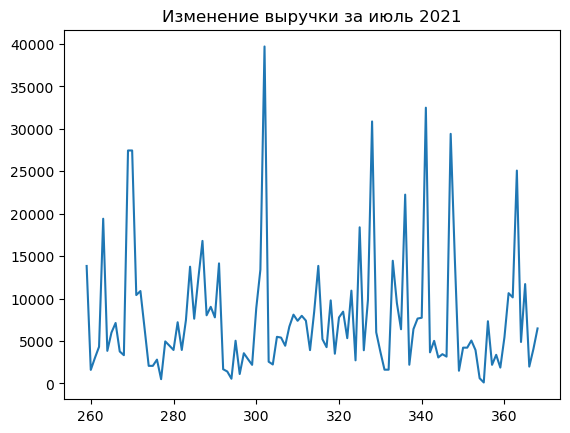

In [65]:
july_frame['sum'].plot(title='Изменение выручки за июль 2021');

**Вывод**

- Ближе к середине июля был пик по выручке
- После пика был сильный упадок и постепенный рост

### Вопрос 3

Рассмотрим сентябрь

In [67]:
september_frame

,client_id,sum,status,sale,new/current,document,receiving_date
485,15.0,14288.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08 00:00:00
486,16.0,1494.0,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-10-08 00:00:00
487,21.0,893.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-20 00:00:00
488,24.0,18142.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-10-15 00:00:00
489,30.0,3833.7,В РАБОТЕ,Филимонова,текущая,NaN,NaN
...,...,...,...,...,...,...,...
589,304.0,1313.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-13 00:00:00
590,285.0,3453.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-10-05 00:00:00
591,285.0,4328.7,ОПЛАЧЕНО,Васильев,новая,оригинал,2021-10-05 00:00:00
592,286.0,4078.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-20 00:00:00


In [18]:
september_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 485 to 593
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       109 non-null    float64
 1   sum             109 non-null    float64
 2   status          109 non-null    object 
 3   sale            109 non-null    object 
 4   new/current     109 non-null    object 
 5   document        106 non-null    object 
 6   receiving_date  92 non-null     object 
dtypes: float64(2), object(5)
memory usage: 6.1+ KB


Пропусков в нужных нам столбцах нет

In [19]:
september_frame[september_frame['status'] == 'ОПЛАЧЕНО'].groupby('sale')['sum'].agg('sum')

sale
Андреев       130983.80
Васильев       45416.75
Иванов         94476.90
Кузнецова      72228.40
Михайлов        4268.70
Петрова        98284.16
Смирнов       205258.30
Соколов        35183.50
Филимонова     39020.80
Name: sum, dtype: float64

**Вывод** 

Больше всего денежных средств в сентябре 2021 привлёк - **Смирнов**.

### Вопрос 4

In [20]:
october_frame['new/current'].value_counts()

текущая    99
новая      36
Name: new/current, dtype: int64

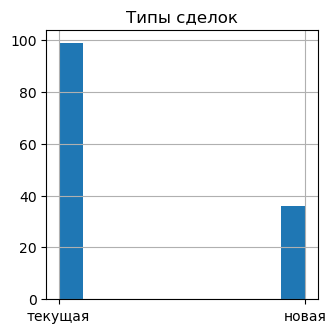

In [64]:
plt.title('Типы сделок')
october_frame['new/current'].hist(figsize = (3.5,3.5));

In [22]:
october_frame['new/current'].value_counts().sum()

135

**Вывод**

- В октябре 2021 было 135 сделок: 99-текущих, 36-новых.
- Преобладающий тип сделок - **текущий**.

### Вопрос 5

Рассмотрим май

In [23]:
may_frame.head()

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00


In [24]:
may_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 2 to 128
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       127 non-null    float64
 1   sum             127 non-null    float64
 2   status          127 non-null    object 
 3   sale            127 non-null    object 
 4   new/current     127 non-null    object 
 5   document        123 non-null    object 
 6   receiving_date  127 non-null    object 
dtypes: float64(2), object(5)
memory usage: 7.1+ KB


- Есть пропуски в столбце `document`, обработаем их
- Столбец `receiving_date` имеет тип `object`, для удобной работы поменяем тип на `datetime`

In [25]:
may_frame[may_frame['document'].isnull()]

,client_id,sum,status,sale,new/current,document,receiving_date
47,87.0,9948.7,ОПЛАЧЕНО,Смирнов,новая,NaN,2021-06-17 00:00:00
48,90.0,16123.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28 00:00:00
49,91.0,1053.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28 00:00:00
93,198.0,4458.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-01 00:00:00


Есть дата получения оригинала, заполним пропуски

In [26]:
may_frame['document'] = may_frame['document'].fillna('оригинал')

Поменяем тип данных столбца `receiving_date`

In [27]:
may_frame['receiving_date'] = pd.to_datetime(may_frame['receiving_date'], format='%Y.%m.%d %H:%M:%S')

In [28]:
may_frame.head()

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15


In [29]:
may_frame['receiving_date'].between('2021-06-01', '2021-06-30', inclusive = 'both').sum()

77

**Вывод**

В июне донесли оригинал договора за майский месяц 77 раз.

## Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

### Решение

Создадим новый датафрейм, в котором будет два месяца: Май и Июнь

#### Объединение датафреймов

In [30]:
may_june = pd.concat([may_frame, june_frame])

In [31]:
may_june

,client_id,sum,status,sale,new/current,document,receiving_date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00
...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00


#### Добавление столбцов

Добавим новый столбец, в котором будет месяц подачи оригинала

In [32]:
temp = pd.to_datetime(may_june['receiving_date'], format='%Y.%m.%d %H:%M:%S')
may_june['receiving_month'] = pd.DatetimeIndex(temp).month

#### Обработка пропусков

Проверим на пропуски

In [33]:
may_june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 2 to 257
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        255 non-null    float64
 1   sum              255 non-null    float64
 2   status           255 non-null    object 
 3   sale             255 non-null    object 
 4   new/current      255 non-null    object 
 5   document         254 non-null    object 
 6   receiving_date   254 non-null    object 
 7   receiving_month  254 non-null    float64
dtypes: float64(3), object(5)
memory usage: 17.9+ KB


- Заполним пропуски в столбце `document` значением `оригинал`, если дата подачи оригинала известна
- Заполним пропуск в столбце `receiving_month` значением `0`, так мы будем понимать, что оригинал ещё не донесли

In [34]:
may_june[may_june['document'].isnull()]

,client_id,sum,status,sale,new/current,document,receiving_date,receiving_month
189,115.0,298.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-07-14 00:00:00,7.0


Дата известна, заполним пропуски

In [35]:
may_june['document'] = may_june['document'].fillna('оригинал')
may_june['receiving_month'] = may_june['receiving_month'].fillna(0)

In [36]:
may_june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 2 to 257
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        255 non-null    float64
 1   sum              255 non-null    float64
 2   status           255 non-null    object 
 3   sale             255 non-null    object 
 4   new/current      255 non-null    object 
 5   document         255 non-null    object 
 6   receiving_date   254 non-null    object 
 7   receiving_month  255 non-null    float64
dtypes: float64(3), object(5)
memory usage: 17.9+ KB


#### Вычисление бонусов и остатков

Создадим два новых столбца, в одном будет записан бонус, во втором остаток

In [37]:
may_june['remainder'] = 0

In [38]:
def remainder(row):
    #Проверка на есть ли договор
    if row['receiving_month'] == 0:
        return 0
    #Проверка на оригинал в мае и в июне
    if row['receiving_month'] not in [5,6]:
        # Проверка на новую сделку
        new = (row['status'] == 'ОПЛАЧЕНО') and (row['document'] == 'оригинал') and (row['new/current'] == 'новая')
        
        #Проверка на текущую сделку
        current = (row['status'] != 'ПРОСРОЧЕНО') and (row['new/current'] == 'текущая') and (row['document'] == 'оригинал')     
        
        if new:
            return row['sum'] * 0.07
    
        if current and (row['sum'] >= 10000):
            return row['sum'] * 0.05
        elif current and (row['sum'] < 10000):
            return row['sum'] * 0.03
        
    return 0

In [39]:
may_june['remainder'] = may_june.apply(remainder, axis=1)

In [40]:
may_june

,client_id,sum,status,sale,new/current,document,receiving_date,receiving_month,remainder
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,7.0,381.689
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,6.0,0.000
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,6.0,0.000
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,7.0,127.611
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15 00:00:00,7.0,173.901
...,...,...,...,...,...,...,...,...,...
253,281.0,5733.7,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22 00:00:00,7.0,172.011
254,282.0,953.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16 00:00:00,7.0,66.759
255,284.0,8823.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-09-08 00:00:00,9.0,0.000
256,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22 00:00:00,7.0,103.611


Сгруппируем по менеджерам и выведим сумму их остатка на 1 число июня 2021 года

In [41]:
may_june.groupby('sale')['remainder'].agg('sum').sort_values(ascending=False)

sale
Петрова       10770.7474
Смирнов        7401.8220
Иванов         5991.4520
Селиванов      5297.6900
Кузнецова      4496.9501
Андреев        3954.7907
Филимонова     2317.9579
Васильев       1037.0490
Соколов         269.2110
Name: remainder, dtype: float64

Построим график

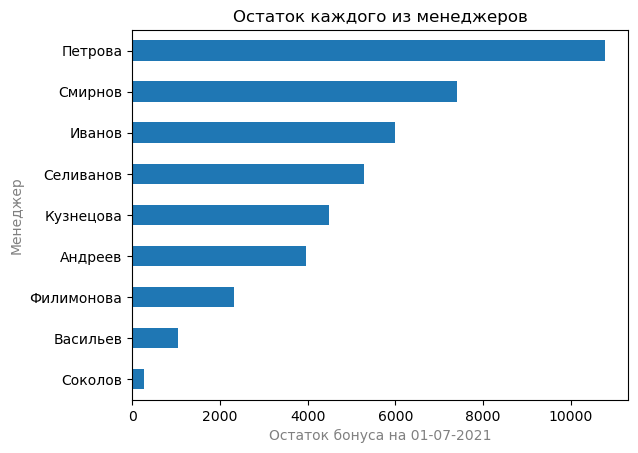

In [63]:
plt.title('Остаток каждого из менеджеров')
may_june.groupby('sale')['remainder'].agg('sum').sort_values().plot.barh()

plt.xlabel('Остаток бонуса на 01-07-2021', color='gray')
plt.ylabel('Менеджер',color='gray');

**Вывод**

| Менеджер       | Остаток бонуса |
|-----------|------------|
| Петрова   | 10770.7474 |
| Смирнов   | 7401.8220  |
| Иванов    | 5991.4520  |
| Селиванов | 5297.6900  |
| Кузнецова | 4496.9501  |
| Андреев   | 3954.7907  |
| Филимонова| 2317.9579  |
| Васильев  | 1037.0490  |
| Соколов   | 269.2110   |


# Отчёт

Была проделана работа по анализу данных и решены следующие проблемы:

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

- Общая выручка за июль 2021 без учёта просроченных составляет **852012.8699999998**

1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

- Общая выручка за июль 2021 без учёта просроченных составляет **852012.8699999998**

2) Как изменялась выручка компании за рассматриваемый период?
- Ближе к середине июля был пик по выручке
- После пика был сильный упадок и постепенный рост

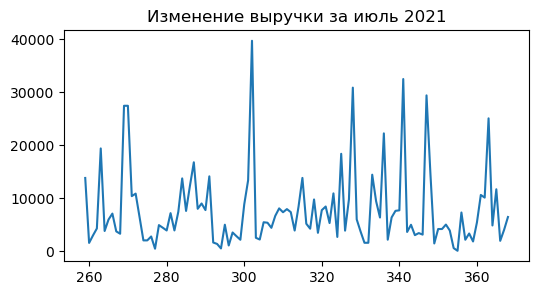

In [62]:
july_frame['sum'].plot(title='Изменение выручки за июль 2021', figsize=(6,3));

3) Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

- Больше всего денежных средств в сентябре 2021 привлёк - **Смирнов**.

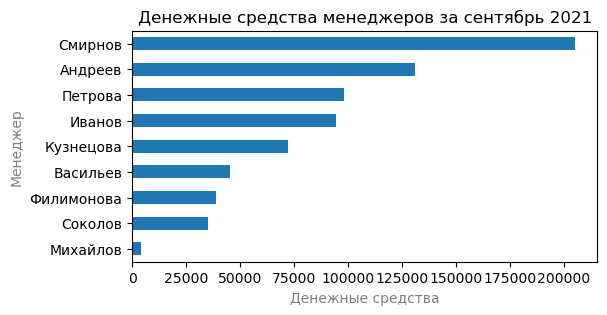

In [61]:
plt.title('Денежные средства менеджеров за сентябрь 2021')
september_frame[september_frame['status'] == 'ОПЛАЧЕНО'].groupby('sale')['sum'].agg('sum').sort_values().plot.barh(figsize=(6,3))
plt.xlabel('Денежные средства', color='gray')
plt.ylabel('Менеджер',color='gray');


<div style="display: none;">
```python



</div>

4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

- В октябре 2021 было 135 сделок: 99-текущих, 36-новых.
- Преобладающий тип сделок - **текущий**.

<Axes: title={'center': 'Типы сделок'}>

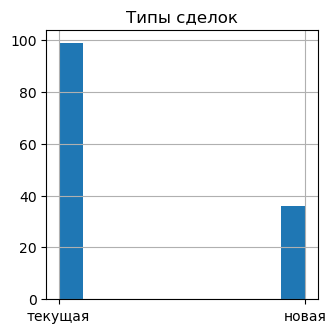

In [59]:
plt.title('Типы сделок')
october_frame['new/current'].hist(figsize = (3.5,3.5))

5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

- В июне донесли оригинал договора за майский месяц 77 раза.

6. Вычислить остаток каждого из менеджеров на 01.07.2021

- Остаток каждого из менеджеров на 01.07.2021
| Менеджер       | Остаток бонуса |
|-----------|------------|
| Петрова   | 10770.7474 |
| Смирнов   | 7401.8220  |
| Иванов    | 5991.4520  |
| Селиванов | 5297.6900  |
| Кузнецова | 4496.9501  |
| Андреев   | 3954.7907  |
| Филимонова| 2317.9579  |
| Васильев  | 1037.0490  |
| Соколов   | 269.2110   |